In [1]:
import pandas as pd

In [2]:
file_name = 'life_expectancy.csv'

In [9]:
life = pd.read_csv(file_name,skiprows=2,header=1,usecols=['Country Name','Country Code','2018'])

In [10]:
life['20']

,Country Name,Country Code,2018
0,Aruba,ABW,76.152000
1,Afghanistan,AFG,64.486000
2,Angola,AGO,60.782000
3,Albania,ALB,78.458000
4,Andorra,AND,NaN
...,...,...,...
259,Kosovo,XKX,72.195122
260,"Yemen, Rep.",YEM,66.096000
261,South Africa,ZAF,63.857000
262,Zambia,ZMB,63.510000


In [11]:
import plotly.express as px

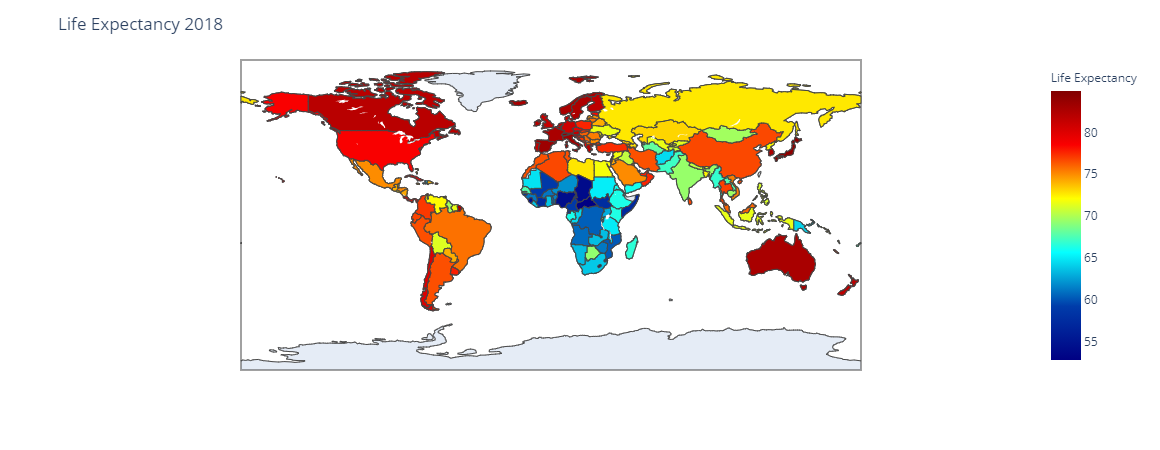

In [22]:
fig = px.choropleth(data_frame=life,locationmode='ISO-3',locations='Country Code',scope='world',color='2018',labels={'2018': 'Life Expectancy'},hover_name='Country Name',color_continuous_scale='Jet')
fig.update_layout(title='Life Expectancy 2018')

In [23]:
test = life.copy()

In [25]:
test['2019'] = test['2018']

In [26]:
test

,Country Name,Country Code,2018,2019
0,Aruba,ABW,76.152000,76.152000
1,Afghanistan,AFG,64.486000,64.486000
2,Angola,AGO,60.782000,60.782000
3,Albania,ALB,78.458000,78.458000
4,Andorra,AND,NaN,NaN
...,...,...,...,...
259,Kosovo,XKX,72.195122,72.195122
260,"Yemen, Rep.",YEM,66.096000,66.096000
261,South Africa,ZAF,63.857000,63.857000
262,Zambia,ZMB,63.510000,63.510000


In [30]:
test2 = test.melt(id_vars=['Country Name','Country Code'],value_vars=['2018','2019'],var_name='Year',value_name='Life Exp.')

In [31]:
test2

,Country Name,Country Code,Year,Life Exp.
0,Aruba,ABW,2018,76.152000
1,Afghanistan,AFG,2018,64.486000
2,Angola,AGO,2018,60.782000
3,Albania,ALB,2018,78.458000
4,Andorra,AND,2018,NaN
...,...,...,...,...
523,Kosovo,XKX,2019,72.195122
524,"Yemen, Rep.",YEM,2019,66.096000
525,South Africa,ZAF,2019,63.857000
526,Zambia,ZMB,2019,63.510000


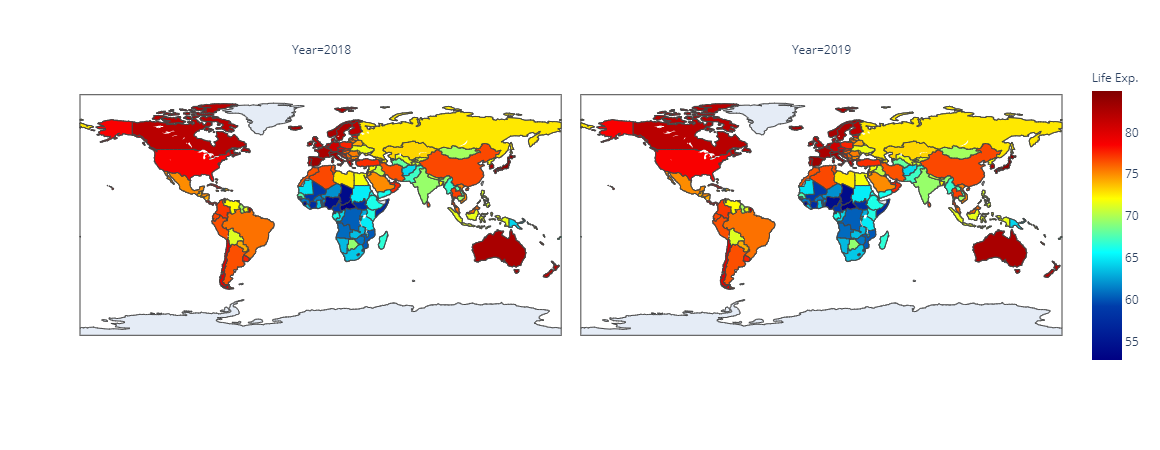

In [36]:
fig = px.choropleth(data_frame=test2,locationmode='ISO-3',locations='Country Code',scope='world',color='Life Exp.',labels={'2018': 'Life Expectancy'},hover_name='Country Name',color_continuous_scale='Jet',facet_col='Year')
fig.show()

In [38]:
test3 = pd.read_csv(file_name,skiprows=2,header=1,usecols=['Country Name','Country Code','1960','2018'])

,Country Name,Country Code,1960,2018
0,Aruba,ABW,65.662,76.152000
1,Afghanistan,AFG,32.446,64.486000
2,Angola,AGO,37.524,60.782000
3,Albania,ALB,62.283,78.458000
4,Andorra,AND,NaN,NaN
...,...,...,...,...
259,Kosovo,XKX,NaN,72.195122
260,"Yemen, Rep.",YEM,29.919,66.096000
261,South Africa,ZAF,48.406,63.857000
262,Zambia,ZMB,46.687,63.510000


In [41]:
test3 =test3.melt(id_vars=['Country Name','Country Code'],value_vars=['1960','2018'],value_name='Life Exp.',var_name='Year')

In [42]:
test3

,Country Name,Country Code,Year,Life Exp.
0,Aruba,ABW,1960,65.662000
1,Afghanistan,AFG,1960,32.446000
2,Angola,AGO,1960,37.524000
3,Albania,ALB,1960,62.283000
4,Andorra,AND,1960,NaN
...,...,...,...,...
523,Kosovo,XKX,2018,72.195122
524,"Yemen, Rep.",YEM,2018,66.096000
525,South Africa,ZAF,2018,63.857000
526,Zambia,ZMB,2018,63.510000


In [44]:
import plotly.offline as po

In [45]:
fig = px.choropleth(data_frame=test3,locationmode='ISO-3',locations='Country Code',scope='world',color='Life Exp.',labels={'2018': 'Life Expectancy'},hover_name='Country Name',color_continuous_scale='Jet',facet_col='Year')
po.plot(fig,filename='1960vs2018.html')

'1960vs2018.html'

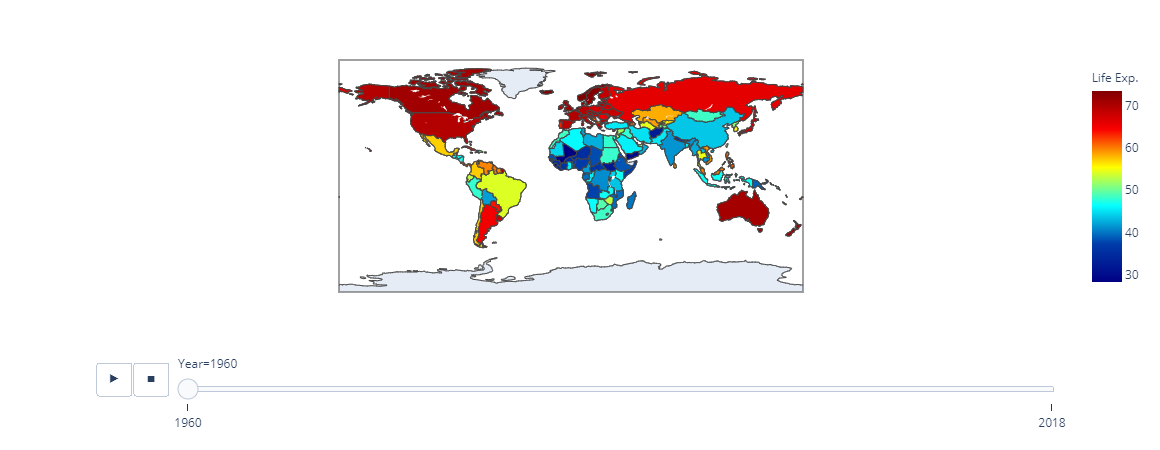

In [48]:
fig = px.choropleth(data_frame=test3,locationmode='ISO-3',locations='Country Code',scope='world',color='Life Exp.',labels={'2018': 'Life Expectancy'},hover_name='Country Name',color_continuous_scale='Jet',animation_frame='Year')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500
fig.show()